<a href="https://colab.research.google.com/github/henriqueburis/FaceMatch/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install opencv-python
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=2286fad2be51ac1d5a052f4a95a0be61393d76a23a743e884ed7f22e68cb33d3
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


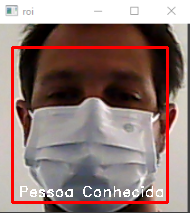

In [ ]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow

# Carregue a imagem da pessoa que você deseja reconhecer
pessoa_conhecida_image = face_recognition.load_image_file("/content/Capturar2.PNG")
pessoa_conhecida_face_encoding = face_recognition.face_encodings(pessoa_conhecida_image)[0]

# Inicialize a webcam ou carregue um vídeo
#cap = cv2.VideoCapture(0)  # Use 0 para a webcam padrão, ou substitua pelo caminho do vídeo
cap = cv2.VideoCapture("/content/roi.PNG")

while True:
    ret, frame = cap.read()

    # Encontre todas as faces no frame atual
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)

    for face_encoding in face_encodings:
        # Compare a face atual com a face conhecida
        matches = face_recognition.compare_faces([pessoa_conhecida_face_encoding], face_encoding)

        if True in matches:
            name = "Pessoa Conhecida"
        else:
            name = "Desconhecido"

        # Desenhe um retângulo ao redor da face e coloque o nome
        top, right, bottom, left = face_locations[0]
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.putText(frame, name, (left + 6, bottom - 6), cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 255, 255), 1)

    #cv2.imshow('Face Match', frame)
    cv2_imshow(frame)

    break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()